<a href="https://colab.research.google.com/github/andBabaev/git_learn/blob/master/fontoto_cupones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget 'https://clientsapi11.bkfon-resource.ru/superexpress-info/list/ru/484/kvits.htm'

--2020-04-15 09:41:43--  https://clientsapi11.bkfon-resource.ru/superexpress-info/list/ru/484/kvits.htm
Resolving clientsapi11.bkfon-resource.ru (clientsapi11.bkfon-resource.ru)... 188.42.29.150
Connecting to clientsapi11.bkfon-resource.ru (clientsapi11.bkfon-resource.ru)|188.42.29.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3959247 (3.8M) [text/html]
Saving to: ‘kvits.htm.1’

kvits.htm.1         100%[===================>]   3.78M  3.10MB/s    in 1.2s    

2020-04-15 09:41:46 (3.10 MB/s) - ‘kvits.htm.1’ saved [3959247/3959247]



In [0]:
from copy import deepcopy
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
with open('kvits.htm', 'r', encoding = "cp1251") as f:
  content = f.read()
  soup = BeautifulSoup(content, 'lxml')

In [0]:
info = soup.findAll('b')
_, _, num_draw, date_draw, time_draw = info[0].text.split()
num_draw, date_draw, time_draw

('484.', '14.04.2020', '21:45')

ФОН-Тото+. Тираж 389. 02.02.2020 17:30
Футбол. Испания. Премьер-Лига
Футбол. Испания. Сегунда
Футбол. Германия. Бундеслига
Футбол. Италия. Серия А
Футбол. Франция. Премьер-Лига
Футбол. Швейцария. Суперлига
Хоккей. НХЛ
Принято карточек 259 646, число вариантов  535 720, общая сумма 24 515 416
Список карточек

In [0]:
%%time
rows = []
for row in content.strip().split('\n')[38:-3]:
  num_coupon, _, _, prediction = row.split()
  #print(num_coupon, prediction)
  #rows.append(row.split())
  rows.append([num_coupon, prediction])

CPU times: user 332 ms, sys: 10.1 ms, total: 342 ms
Wall time: 341 ms


In [0]:
rows[:10]

[['19', '[2,1,2,1,X,2,X,1,2,1,1,1,1,2,1]'],
 ['26', '[X,X,1,1,1,X,1,2,X,X,1,2,X,X,1]'],
 ['33', '[1,2,1,X,1,1,2,1,1,2,X,1,1,2,X]'],
 ['40', '[X,1,1,X,2,1,X,2,1,2,1,X,2,2,X]'],
 ['57', '[X,1,1,2,1,X,2,2,1,1,1,X,X,1,2]'],
 ['64', '[1,2,1,X,1,2,1,1,1,2,1,1,2,X,1]'],
 ['71', '[2,X,2,1,1,1,2,2,X,1,1,X,1,2,X]'],
 ['88', '[2,2,X,X,2,X,2,1,1,X,2,1,2,1,2]'],
 ['95', '[1,2,2,1,2,1,2,2,1,1,X,1,X,2,X]'],
 ['103', '[1,2,X,2,1,2,X,2,1,2,1,2,1,X,2]']]

In [0]:
#all_variants без номера тиража

all_variants = []
for _, row in tqdm(rows):
  list_ = []
  row = row.replace('[','').replace(']','').split(',')
  for match in row:
    if len(match) > 1:
      if list_:
        temp = deepcopy(list_)
        list_ = []
        for res in match:
          for elem in temp:
            list_.append(elem+res)
      else:
        for res in match:
            list_.append(res)

    else:
      if list_:
        for i in range(len(list_)):
          list_[i] += match
      else:
        list_.append(match)

  all_variants.extend(list_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
c = Counter(all_variants)
c.most_common(10)

[('111111111111111', 299),
 ('222222222222222', 243),
 ('212121211212111', 197),
 ('XXXXXXXXXXXXXXX', 156),
 ('212121211111111', 121),
 ('212221211112111', 118),
 ('212221211111111', 85),
 ('212221211212111', 78),
 ('212121211112111', 62),
 ('212121212121212', 57)]

In [0]:
#all_variants с номером тиража

all_variants = []
for num_draw, row in tqdm(rows):
  list_ = []
  row = row.replace('[','').replace(']','').split(',')
  for match in row:
    if len(match) > 1:
      if list_:
        temp = deepcopy(list_)
        list_ = []
        for res in match:
          for _, elem in temp:
            list_.append([num_draw, elem+res])
      else:
        for res in match:
            list_.append([num_draw, res])

    else:
      if list_:
        for i in range(len(list_)):
          list_[i][1] += match
      else:
        list_.append([num_draw, match])

  all_variants.extend(list_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(len(all_variants))

123524


In [0]:
true_res = '12XXXX1211XX2X2'
print(len(true_res))

15


In [0]:
%%time
'''for i, pred_res in enumerate(tqdm(all_variants)):
  count = 0
  for true, pred in zip(true_res, pred_res[1]):
    if true == pred:
      count += 1
  all_variants[i].append(count)'''

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


'for i, pred_res in enumerate(tqdm(all_variants)):\n  count = 0\n  for true, pred in zip(true_res, pred_res[1]):\n    if true == pred:\n      count += 1\n  all_variants[i].append(count)'

In [0]:
df = pd.DataFrame(all_variants, columns=['number_draw', 'prediction'])
df['number_draw'] = df['number_draw'].astype(np.int32)
df.head()

,number_draw,prediction
0,19,2121X2X12111121
1,26,XX111X12XX12XX1
2,33,121X112112X112X
3,40,X11X21X2121X22X
4,57,X1121X22111XX12


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   number_draw  123524 non-null  int32 
 1   prediction   123524 non-null  object
dtypes: int32(1), object(1)
memory usage: 1.4+ MB


In [0]:
true_res = '2XXX2X2XX112211'
def res_comparision(row):
  count = 0
  for true, pred in zip(true_res, row['prediction']):
    if true == pred:
      count += 1
  return count

In [0]:
df['num_true_pred'] = df.apply(res_comparision, axis=1)
df.head()

,number_draw,prediction,num_true_pred
0,19,2121X2X12111121,4
1,26,XX111X12XX12XX1,6
2,33,121X112112X112X,2
3,40,X11X21X2121X22X,4
4,57,X1121X22111XX12,5


In [0]:
pred_counter = df.prediction.value_counts()
df['frequency_result'] = df.apply(lambda row: pred_counter[row['prediction']], axis=1)
df.head()

,number_draw,prediction,num_true_pred,frequency_result
0,19,2121X2X12111121,4,18
1,26,XX111X12XX12XX1,6,1
2,33,121X112112X112X,2,1
3,40,X11X21X2121X22X,4,4
4,57,X1121X22111XX12,5,1


In [0]:
%%time
temp_list = []
for i in df.prediction.values.tolist():
  temp_list.append(list(i))

col_temp = ['game_%s' % i for i in range(1,16)]
temp_df = pd.DataFrame(temp_list,columns=col_temp, index=df.index)
print(temp_df.head())

  game_1 game_2 game_3 game_4 game_5  ... game_11 game_12 game_13 game_14 game_15
0      2      1      2      1      X  ...       1       1       1       2       1
1      X      X      1      1      1  ...       1       2       X       X       1
2      1      2      1      X      1  ...       X       1       1       2       X
3      X      1      1      X      2  ...       1       X       2       2       X
4      X      1      1      2      1  ...       1       X       X       1       2

[5 rows x 15 columns]
CPU times: user 495 ms, sys: 26.8 ms, total: 522 ms
Wall time: 521 ms


In [0]:
df = pd.concat([df, temp_df], axis=1)
df.head()

,number_draw,prediction,num_true_pred,frequency_result,game_1,game_2,game_3,game_4,game_5,game_6,game_7,game_8,game_9,game_10,game_11,game_12,game_13,game_14,game_15
0,19,2121X2X12111121,4,18,2,1,2,1,X,2,X,1,2,1,1,1,1,2,1
1,26,XX111X12XX12XX1,6,1,X,X,1,1,1,X,1,2,X,X,1,2,X,X,1
2,33,121X112112X112X,2,1,1,2,1,X,1,1,2,1,1,2,X,1,1,2,X
3,40,X11X21X2121X22X,4,4,X,1,1,X,2,1,X,2,1,2,1,X,2,2,X
4,57,X1121X22111XX12,5,1,X,1,1,2,1,X,2,2,1,1,1,X,X,1,2


In [0]:
temp_df = df[(df.frequency_result<11)]
pd.crosstab(temp_df.frequency_result, temp_df.num_true_pred)

num_true_pred,0,1,2,3,4,5,6,7,8,9,10,11,12,13
frequency_result,,,,,,,,,,,,,,
1,195,1547,5832,13291,20959,23820,20205,12964,6151,2184,590,113,15,4
2,10,54,268,842,1584,1932,1698,1106,494,178,20,8,0,0
3,0,15,42,159,381,531,543,303,147,33,9,3,0,0
4,0,8,32,72,144,312,256,112,64,12,0,0,0,0
5,0,0,15,20,75,200,130,85,65,15,0,0,0,0
6,0,6,12,18,18,96,60,60,24,12,0,0,0,0
7,0,7,0,21,21,70,84,28,28,0,0,0,0,0
8,0,0,0,16,24,56,72,40,8,0,0,0,0,0
9,0,9,0,9,18,18,27,18,0,0,0,0,0,0


In [0]:
df[(df.frequency_result<10) & (df.frequency_result>2)]['num_true_pred'].value_counts()

5     1283
6     1172
4      681
7      646
8      336
3      315
2      101
9       72
1       45
10       9
11       3
Name: num_true_pred, dtype: int64

In [0]:
df[df.num_true_pred>8]['frequency_result'].value_counts()

1     2906
2      206
3       45
20      20
17      17
5       15
6       12
4       12
Name: frequency_result, dtype: int64

In [0]:
df[df.num_true_pred>8].sort_values(['frequency_result', 'num_true_pred'], ascending=[False, False]).head(20)

,number_draw,prediction,num_true_pred,frequency_result,game_1,game_2,game_3,game_4,game_5,game_6,game_7,game_8,game_9,game_10,game_11,game_12,game_13,game_14,game_15
3993,22235,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
7453,41197,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
10232,58056,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
16544,101129,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
21560,131593,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
21686,132325,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
26376,162698,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
28875,174158,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
34898,208648,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1
38720,232913,2X1X2X1X2X1X2X1,9,20,2,X,1,X,2,X,1,X,2,X,1,X,2,X,1


In [0]:
target_col = [i for i in df.columns if 'game_' in i]
for c in target_col:
  res = df[(df.frequency_result<10) & (df.frequency_result>1)][c].value_counts(normalize=True)
  arr = np.array([res['1'], res['2'], res['X']])
  print(c, np.argmax(arr)+1, arr )

game_1 2 [0.33001478 0.55362837 0.11635685]
game_2 1 [0.55961733 0.33273703 0.10764564]
game_3 2 [0.40452672 0.47701641 0.11845687]
game_4 1 [0.46044956 0.44707163 0.09247881]
game_5 2 [0.44831609 0.45772731 0.0939566 ]
game_6 1 [0.68235203 0.23862487 0.0790231 ]
game_7 2 [0.23738042 0.70296337 0.05965622]
game_8 1 [0.67286303 0.25114723 0.07598973]
game_9 1 [0.44380493 0.39495994 0.16123512]
game_10 2 [0.44131601 0.47094968 0.08773431]
game_11 1 [0.68421871 0.24795831 0.06782298]
game_12 2 [0.42467139 0.47507195 0.10025667]
game_13 1 [0.7112079  0.22392471 0.06486739]
game_14 1 [0.62961811 0.29999222 0.07038967]
game_15 1 [0.50338337 0.41277125 0.08384538]


In [0]:
for i, char_ in enumerate(true_res, 1):
  print(i, char_, sep='-', end=' ')

1-2 2-X 3-X 4-X 5-2 6-X 7-2 8-X 9-X 10-1 11-1 12-2 13-2 14-1 15-1 

In [0]:
def f(row):
  return True if variant_counter[row['number_draw']]==1 else False

variant_counter = df.number_draw.value_counts()
temp_df = df[df.apply(f, axis=1)]
temp_df.head()

,number_draw,prediction,num_true_pred,frequency_result,game_1,game_2,game_3,game_4,game_5,game_6,game_7,game_8,game_9,game_10,game_11,game_12,game_13,game_14,game_15
0,19,2121X2X12111121,4,18,2,1,2,1,X,2,X,1,2,1,1,1,1,2,1
1,26,XX111X12XX12XX1,6,1,X,X,1,1,1,X,1,2,X,X,1,2,X,X,1
2,33,121X112112X112X,2,1,1,2,1,X,1,1,2,1,1,2,X,1,1,2,X
3,40,X11X21X2121X22X,4,4,X,1,1,X,2,1,X,2,1,2,1,X,2,2,X
4,57,X1121X22111XX12,5,1,X,1,1,2,1,X,2,2,1,1,1,X,X,1,2


In [0]:
temp_df.shape

(68967, 19)

In [0]:
pd.crosstab(temp_df[(temp_df.frequency_result<11) & (temp_df.frequency_result>0) & (temp_df.number_draw>1200000) & (temp_df.number_draw<2200000)].frequency_result, temp_df.num_true_pred, normalize=False)

""


In [0]:
target_col = [i for i in df.columns if 'game_' in i]
for c in target_col:
  res = temp_df[(temp_df.frequency_result<11) & (temp_df.frequency_result>0) & (temp_df.number_draw>1200000) & (temp_df.number_draw<2200000)][c].value_counts(normalize=True)
  arr = np.array([res['1'], res['2'], res['X']])
  print(c, np.argmax(arr)+1, arr )

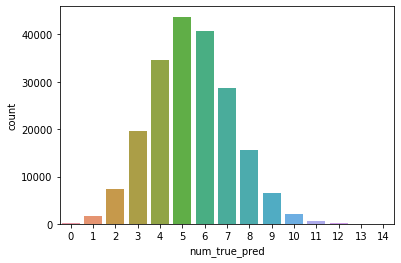

In [0]:
sns.countplot(temp_df[temp_df.frequency_result<11].num_true_pred,)

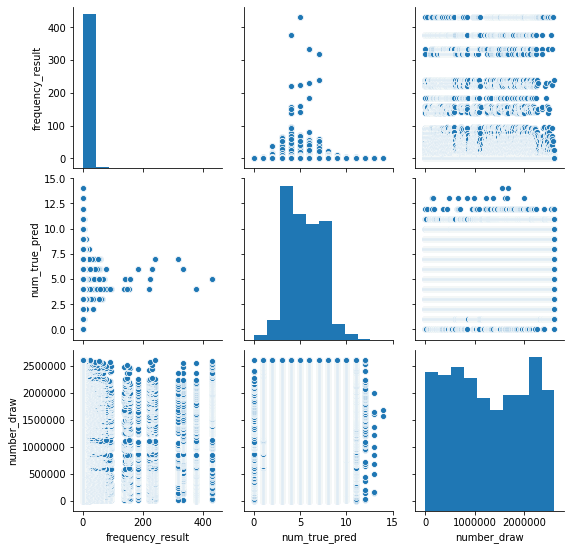

In [0]:
sns.pairplot(df[['frequency_result', 'num_true_pred', 'number_draw']])

In [0]:
import matplotlib.pyplot as plt


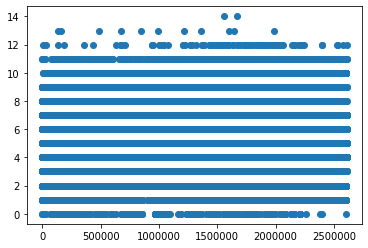

In [0]:
plt.scatter(df.number_draw, df.num_true_pred)

In [0]:
df.describe()

,number_draw,num_true_pred,frequency_result
count,5.357200e+05,535720.000000,535720.000000
mean,1.278371e+06,5.346282,3.713078
std,7.734188e+05,1.734517,23.039124
min,1.400000e+01,0.000000,1.000000
25%,6.017922e+05,4.000000,1.000000
50%,1.225142e+06,5.000000,1.000000
75%,1.994226e+06,6.000000,1.000000
max,2.607161e+06,14.000000,431.000000
